# Importing the Data

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical market data for the last 5 years
nifty50_data = yf.download("^NSEI", period="5y")

[*********************100%%**********************]  1 of 1 completed


In [2]:
Bin_Yearly = nifty50_data['Adj Close'].pct_change(periods=252) * 100
Bin50_Day = nifty50_data['Adj Close'].rolling(window=50).mean()
Bin200_Day = nifty50_data['Adj Close'].rolling(window=200).mean()

In [3]:
# Perform a simple analysis - plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
plt.title('Nifty50 Closing Prices Over Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Moving Average Graph

plt.figure(figsize=(12, 6))
plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
plt.plot(nifty50_data.index, nifty50_data['50-Day MA'], label='50-Day Moving Average')
plt.plot(nifty50_data.index, nifty50_data['200-Day MA'], label='200-Day Moving Average')
plt.title('Nifty50 Closing Prices with 50-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Yearly Returns Graph

plt.figure(figsize=(12, 6))
plt.plot(nifty50_data.index, nifty50_data['Yearly Return'], label='Nifty50 Yearly Return')
plt.title('Nifty50 Yearly Returns Over Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Yearly Return (%)')
plt.legend()
plt.grid(True)
plt.show()

## Cleaning and Pre processing

In [6]:
if 'Dividends' in nifty50_data.columns and 'Stock Splits' in nifty50_data.columns:
    nifty50_data = nifty50_data.drop(columns=['Dividends', 'Stock Splits', 'Close'])

In [7]:
nifty50_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
nifty50_data.drop(columns=['Close'], inplace=True)

In [9]:
# nifty50_data = nifty50_data.drop(columns=['50-Day MA', '200-Day MA', 'Yearly Return'])

# nifty50_data.fillna({
#     '50-Day MA': nifty50_data['50-Day MA'].median(),
#     '200-Day MA': nifty50_data['200-Day MA'].median(),
#     'Yearly Return': nifty50_data['Yearly Return'].median()
# }, inplace=True)


Creating 3 bins, 50-Day Average, 200-Day Average, Yearly-Average

In [10]:
Bin50_Day.fillna(Bin50_Day.mode()[0], inplace=True)
Bin200_Day.fillna(Bin200_Day.mode()[0], inplace=True)
Bin_Yearly.fillna(Bin_Yearly.mode()[0], inplace=True)

In [11]:
def showIndexGraphs():
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))
    
    # Plotting the Histogram
    axes[0].plot(Bin50_Day, label='50-Day MA', color='orange')
    axes[0].plot(Bin200_Day, label='200-Day MA', color='blue')
    axes[0].set_title('20-Day & 50-DayMoving Average Trend Line')
    axes[0].set_ylabel('Year')
    axes[0].set_xlabel('Value')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(Bin_Yearly)
    axes[1].set_title('Yearly Returns Trend Line')
    axes[0].set_xlabel('Year')
    axes[1].set_ylabel('Returns %')
    axes[1].grid(True)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


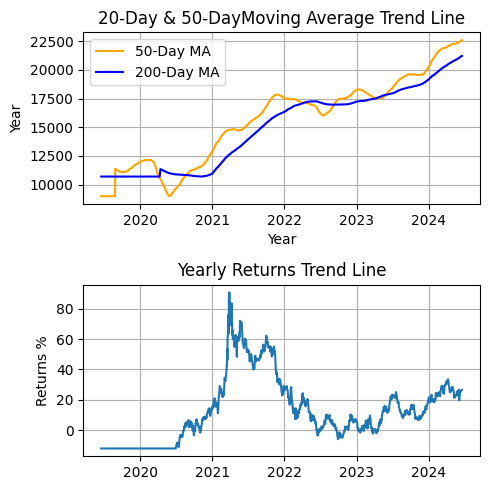

In [12]:
showIndexGraphs()

In [13]:
nifty50_data.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2019-06-18,11677.049805,11727.200195,11641.150391,11691.500000,365500
2019-06-19,11744.450195,11802.500000,11625.099609,11691.450195,446900
2019-06-20,11653.650391,11843.500000,11635.049805,11831.750000,442000
2019-06-21,11827.599609,11827.950195,11705.099609,11724.099609,468400
2019-06-24,11725.799805,11754.000000,11670.200195,11699.650391,277600


Normalizing the Dataset

In [14]:
import numpy as np

nifty_open_scaled = (nifty50_data['Open'] - np.min(nifty50_data['Open'])) / (np.max(nifty50_data['Open']) - np.min(nifty50_data['Open']))
nifty_adjclose_scaled = (nifty50_data['Adj Close'] - np.min(nifty50_data['Adj Close'])) / (np.max(nifty50_data['Adj Close']) - np.min(nifty50_data['Adj Close']))
nifty_high_scaled = (nifty50_data['High'] - np.min(nifty50_data['High'])) / (np.max(nifty50_data['High']) - np.min(nifty50_data['High']))
nifty_low_scaled = (nifty50_data['Low'] - np.min(nifty50_data['Low'])) / (np.max(nifty50_data['Low']) - np.min(nifty50_data['Low']))
nifty_volume_scaled = (nifty50_data['Volume'] - np.min(nifty50_data['Volume'])) / (np.max(nifty50_data['Volume']) - np.min(nifty50_data['Volume']))


In [15]:
nifty50_data_df = pd.DataFrame({'open_scaled': nifty_open_scaled, 'high_scaled': nifty_high_scaled, 
                            'adj_close_scaled': nifty_adjclose_scaled, 'low_scaled': nifty_low_scaled,
                              'volume_scaled': nifty_volume_scaled})

In [16]:
nifty50_data_df

,open_scaled,high_scaled,adj_close_scaled,low_scaled,volume_scaled
Date,,,,,
2019-06-18,0.248926,0.237436,0.256224,0.258312,0.201822
2019-06-19,0.253182,0.242281,0.256221,0.257308,0.246770
2019-06-20,0.247448,0.244919,0.265029,0.257931,0.244064
2019-06-21,0.258433,0.243918,0.258271,0.262312,0.258642
2019-06-24,0.252004,0.239160,0.256736,0.260129,0.153285
...,...,...,...,...,...
2024-06-11,0.981873,0.987801,0.982808,0.981671,0.168526
2024-06-12,0.985706,0.991179,0.986455,0.987257,0.163225
2024-06-13,0.994326,0.993695,0.991223,0.990881,0.148150
